In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract historical financial data using YFinance for 

In [102]:

ticker=['TSLA','BND','SPY']
import datetime
div_data={}
yf_data=yf.download(ticker,start='2015-7-1',end='2025-7-31',actions=True,auto_adjust=True)
print(yf_data.head())

[*********************100%***********************]  3 of 3 completed

Price      Capital Gains           Close                        Dividends  \
Ticker               BND  SPY        BND         SPY       TSLA       BND   
Date                                                                        
2015-07-01           0.0  0.0  60.816719  174.917114  17.943333     0.163   
2015-07-02           0.0  0.0  60.967083  174.756958  18.667999     0.000   
2015-07-06           0.0  0.0  61.177547  174.259598  18.648001     0.000   
2015-07-07           0.0  0.0  61.237717  175.355453  17.858667     0.000   
2015-07-08           0.0  0.0  61.410629  172.413437  16.997334     0.000   

Price                      High              ...        Low       Open  \
Ticker      SPY TSLA        BND         SPY  ...       TSLA        BND   
Date                                         ...                         
2015-07-01  0.0  0.0  60.914445  175.363889  ...  17.856667  60.794167   
2015-07-02  0.0  0.0  61.027225  175.566219  ...  18.220667  60.937012   
2015-07-06  0

# Data cleaning and Understanding

In [103]:
print("basics Statistics")
print(yf_data.describe)
if yf_data.isna().sum().any():
    yf_data=yf_data.fillna(method='ffill')
    print("Missing values filled using forward fill")
yf_data.index=pd.to_datetime(yf_data.index)
#SCALING 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(yf_data)   

    


basics Statistics
<bound method NDFrame.describe of Price      Capital Gains           Close                         Dividends  \
Ticker               BND  SPY        BND         SPY        TSLA       BND   
Date                                                                         
2015-07-01           0.0  0.0  60.816719  174.917114   17.943333     0.163   
2015-07-02           0.0  0.0  60.967083  174.756958   18.667999     0.000   
2015-07-06           0.0  0.0  61.177547  174.259598   18.648001     0.000   
2015-07-07           0.0  0.0  61.237717  175.355453   17.858667     0.000   
2015-07-08           0.0  0.0  61.410629  172.413437   16.997334     0.000   
...                  ...  ...        ...         ...         ...       ...   
2025-07-24           0.0  0.0  72.698860  634.419983  305.299988     0.000   
2025-07-25           0.0  0.0  72.878265  637.099976  316.059998     0.000   
2025-07-28           0.0  0.0  72.758659  636.940002  325.589996     0.000   
2025-07-29  

# Conduct Exploratory Data Analysis (EDA):

##### Visualize the closing price over time to identify trends and patterns

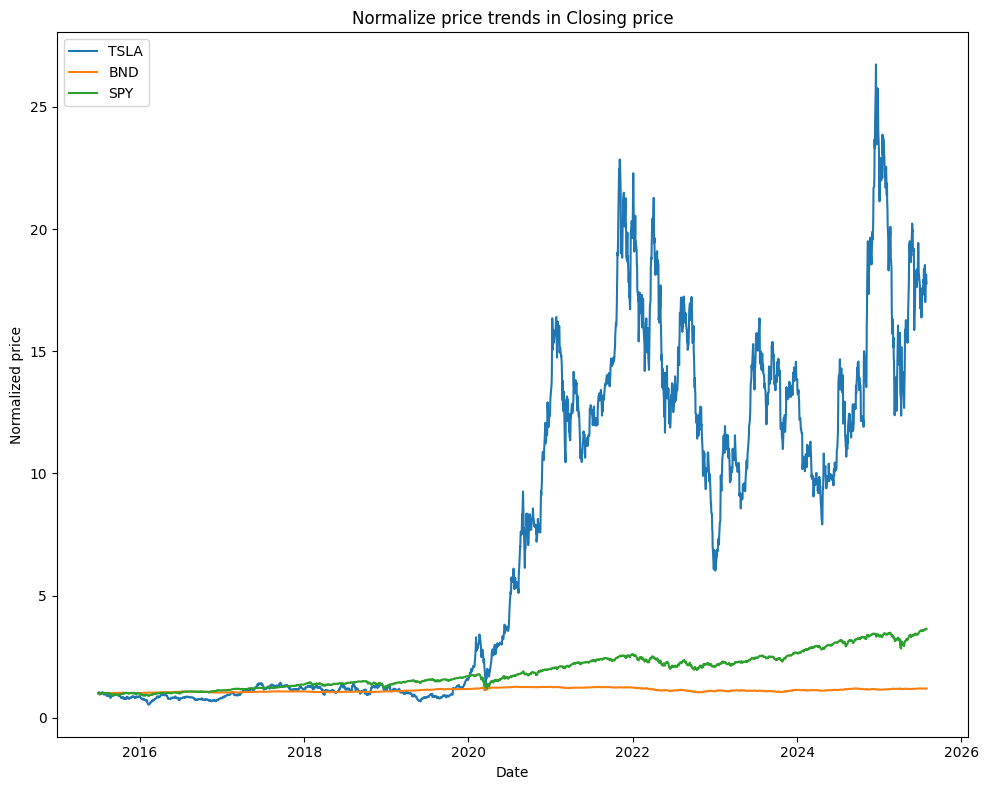

In [104]:
closing_price=yf_data['Close'].copy()
plt.figure(figsize=(10,8))
for stock in ticker:
    plt.plot(closing_price.index,closing_price[stock]/closing_price[stock].iloc[0],label=stock)
plt.title('Normalize price trends in Closing price')
plt.xlabel('Date')
plt.ylabel('Normalized price')
plt.legend()
plt.tight_layout()
plt.show()

##### Calculate and plot the daily percentage change to observe volatility

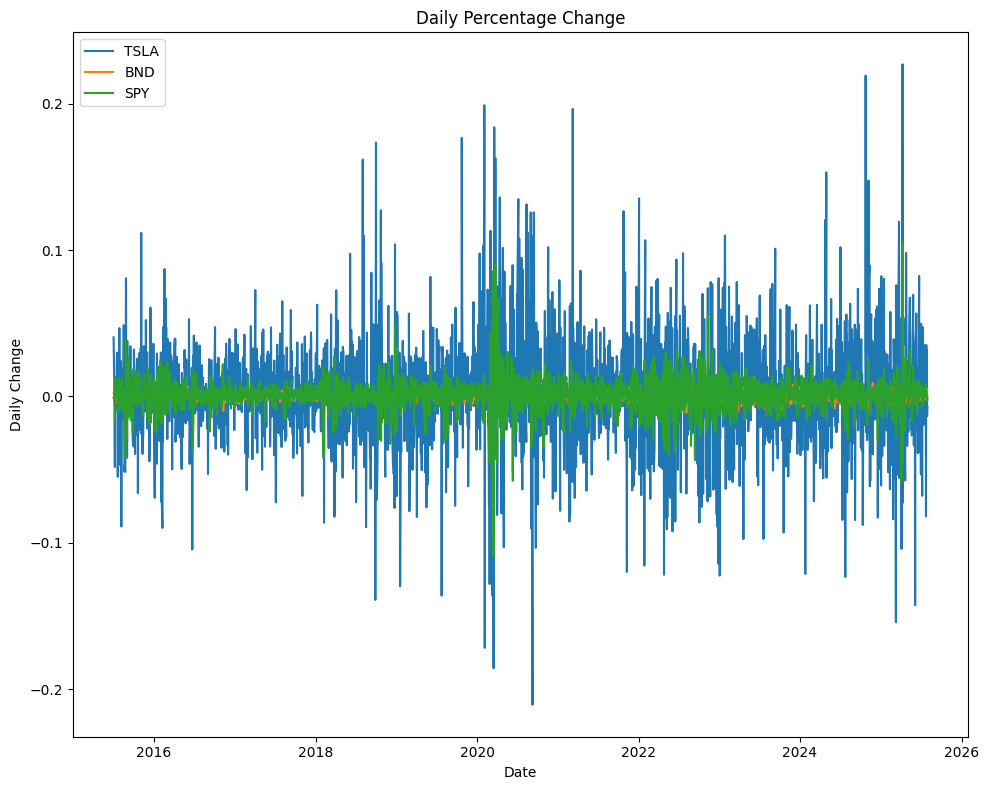

In [105]:
returns=closing_price.pct_change().dropna()
plt.figure(figsize=(10,8))
for stock in ticker:
    plt.plot(returns.index,returns[stock],label=stock)
plt.title("Daily Percentage Change")
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.legend()
plt.tight_layout()
plt.show()

##### Analyze volatility by calculating rolling means and standard deviations to understand short-term trends and fluctuations.

In [106]:
summary_stat=returns.describe().T
summary_stat['anualized_volatility'] =returns.std()* np.sqrt(252)
summary_stat['anualized_return']=returns.mean()*252
#return per risks
summary_stat['sharp_ratio']=summary_stat['anualized_return']/summary_stat['anualized_volatility']
print(summary_stat[['anualized_volatility' , 'anualized_return',  'sharp_ratio']].sort_values(by='sharp_ratio',ascending=False))



        anualized_volatility  anualized_return  sharp_ratio
Ticker                                                     
SPY                 0.182407          0.144844     0.794072
TSLA                0.591887          0.460690     0.778340
BND                 0.054919          0.019599     0.356881


##### Perform outlier detection to identify significantanomalies.Analyze days with unusually high or low returns

In [107]:
returns

Ticker,BND,SPY,TSLA
Date,,,
2015-07-02,0.002472,-0.000916,0.040386
2015-07-06,0.003452,-0.002846,-0.001071
2015-07-07,0.000984,0.006289,-0.042328
2015-07-08,0.002824,-0.016777,-0.048231
2015-07-09,-0.003305,0.001809,0.011610
...,...,...,...
2025-07-24,-0.001232,0.000331,-0.081970
2025-07-25,0.002468,0.004224,0.035244
2025-07-28,-0.001641,-0.000251,0.030152


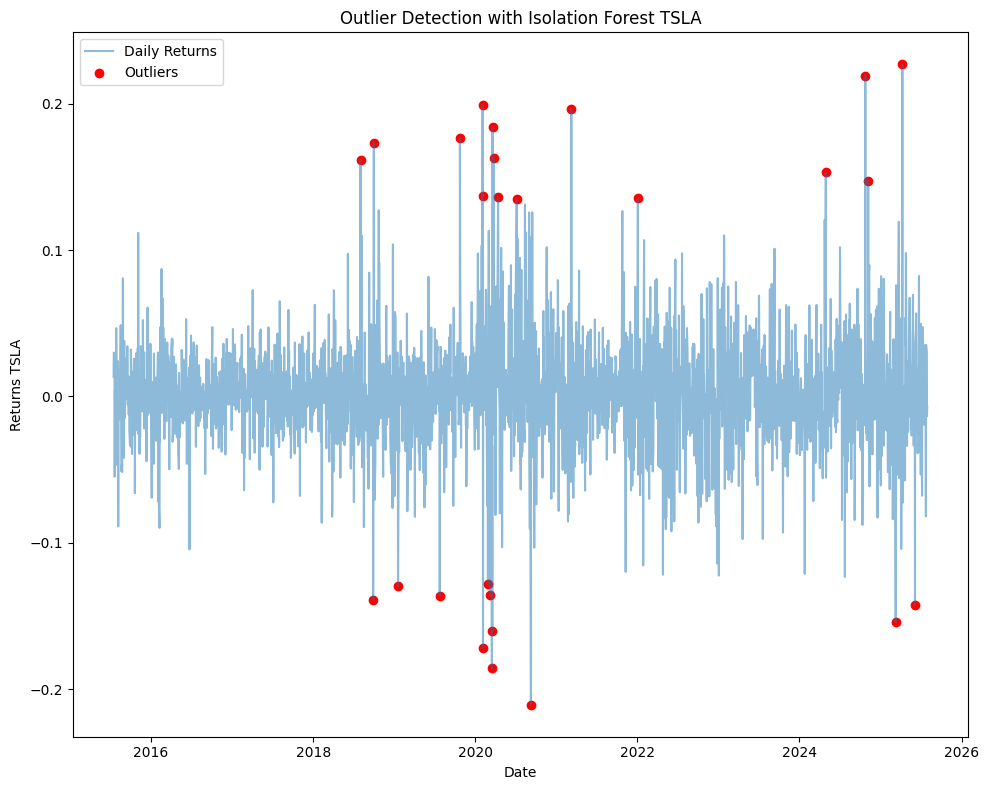

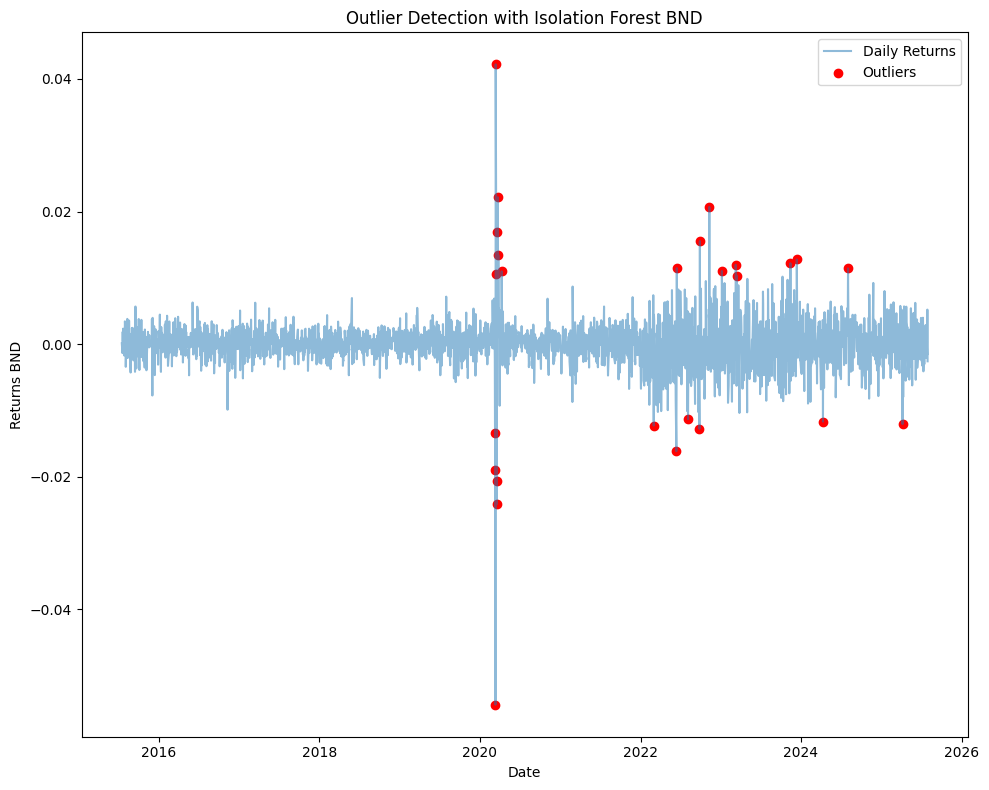

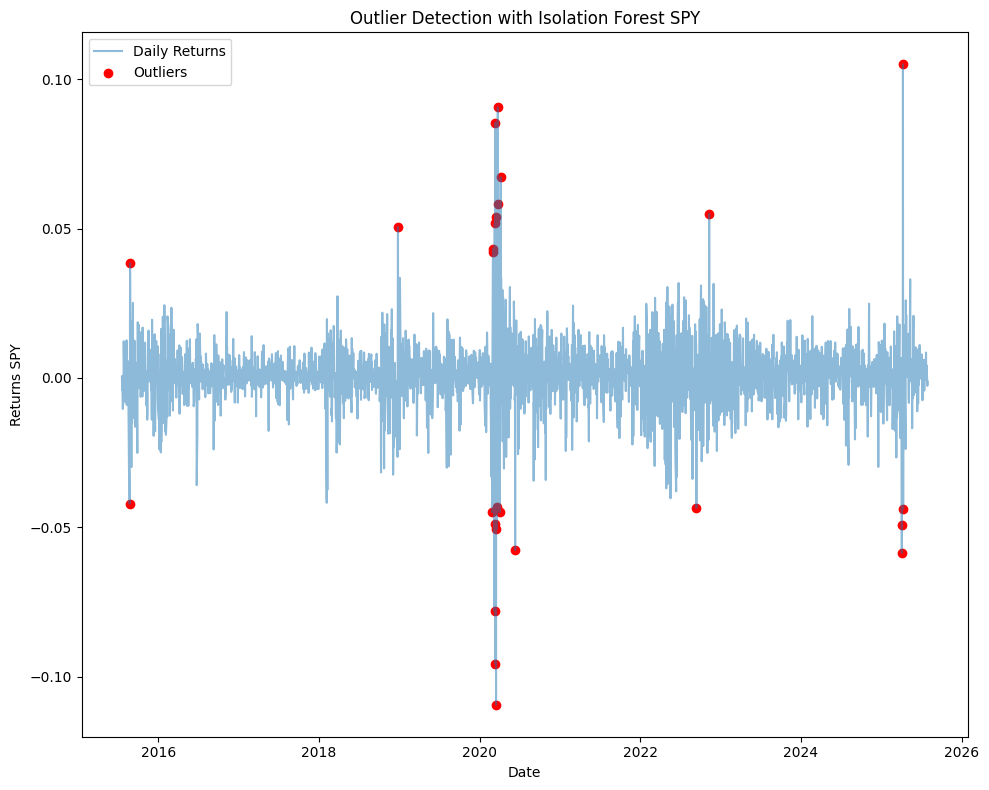

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
for companey in ticker:

    returns = yf_data['Close'][companey].pct_change().dropna()
    yf_data = yf_data.loc[returns.index]
    yf_data['returns'] = returns
    iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    labels = iso_forest.fit_predict(returns.values.reshape(-1, 1))
    yf_data['outlier'] = labels
    normal = yf_data[yf_data['outlier'] == 1]
    outliers = yf_data[yf_data['outlier'] == -1]
    plt.figure(figsize=(10,8))
    plt.plot(yf_data.index, yf_data['returns'], label='Daily Returns', alpha=0.5)
    plt.scatter(outliers.index, outliers['returns'], color='red', label='Outliers')
    plt.xlabel('Date')
    plt.ylabel(f'Returns {companey}')
    plt.title(f'Outlier Detection with Isolation Forest {companey}')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Seasonality and Trends

##### Perform a statistical test (e.g., Augmented Dickey-Fuller test) on the closing prices and daily returns.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationary(stock, data):
   
    data_clean = data.dropna()
    result = adfuller(data_clean)
    
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    print(f"\n=== Stationarity test for {stock} ===")
    print(f"ADF Statistic: {adf_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print("Critical Values:")
    for level, cv in critical_values.items():
        print(f"  {level}: {cv:.4f}")
    
    
    if p_value < 0.05 and adf_stat < critical_values['5%']:
        print(f"Conclusion: {stock} is likely STATIONARY (rejects null hypothesis)")
    else:
        print(f"Conclusion: {stock} is likely NON-STATIONARY (fail to reject null hypothesis)")


for stock in ticker:
    print(f"\n--- Analyzing {stock} Closing Prices ---")
    check_stationary(stock, closing_price[stock])
    
    returns = closing_price[stock].pct_change()
    print(f"\n--- Analyzing {stock} Returns ---")
    check_stationary(stock, returns)



--- Analyzing TSLA Closing Prices ---



=== Stationarity test for TSLA ===
ADF Statistic: -1.4189
P-value: 0.5732
Critical Values:
  1%: -3.4330
  5%: -2.8627
  10%: -2.5674
Conclusion: TSLA is likely NON-STATIONARY (fail to reject null hypothesis)

--- Analyzing TSLA Returns ---

=== Stationarity test for TSLA ===
ADF Statistic: -34.6811
P-value: 0.0000
Critical Values:
  1%: -3.4329
  5%: -2.8627
  10%: -2.5674
Conclusion: TSLA is likely STATIONARY (rejects null hypothesis)

--- Analyzing BND Closing Prices ---

=== Stationarity test for BND ===
ADF Statistic: -1.5363
P-value: 0.5155
Critical Values:
  1%: -3.4329
  5%: -2.8627
  10%: -2.5674
Conclusion: BND is likely NON-STATIONARY (fail to reject null hypothesis)

--- Analyzing BND Returns ---

=== Stationarity test for BND ===
ADF Statistic: -9.8898
P-value: 0.0000
Critical Values:
  1%: -3.4330
  5%: -2.8627
  10%: -2.5674
Conclusion: BND is likely STATIONARY (rejects null hypothesis)

--- Analyzing SPY Closing Prices ---

=== Stationarity test for SPY ===
ADF Statist

### closing price is not stationary because p > 0.05 and Augemented Dickey-fuller statistics is greater 5% values but the returns is stationary p < 0.05 and ADF statistics 5 % Critical point 